### Setting the feelpp environment


In [ ]:
import sys
import feelpp
import feelpp.toolboxes.core as tb
from tools.Poisson import Poisson, runLaplacianPk, runConvergenceAnalysis, plot_convergence, custom_cmap

sys.argv = ["feelpp_app"]
e = feelpp.Environment(sys.argv,
                       opts=tb.toolboxes_options("coefficient-form-pdes", "cfpdes"),
                       config=feelpp.localRepository('feelpp_cfpde'))

# ------------------------------------------------------------------------- #
# Poisson problem
# - div (diff * grad (u)) = f    in Omega
#                     u   = g    in Gamma_D
# Omega = domain, either cube or ball
# Approx = lagrange Pk of order order
# mesh of size h

P = Poisson(dim = 2)



In [ ]:
P(solver="scimba")

### Examples with different parameters

In [ ]:

# for square domain

u_exact = 'sin(2*pi*x) * sin(2*pi*y)'
rhs = '8*pi*pi*sin(2*pi*x) * sin(2*pi*y)'

P(h=0.0125 ,rhs=rhs, g='0', solver ='scimba', u_exact = u_exact)


In [ ]:

u_exact = 'y + (x*(1-x) + y*(1-y)/4) '
P(rhs='5/2', g='y', solver ='scimba', u_exact = u_exact)


In [ ]:
# for disk domain

u_exact = 'sin(pi*(x*x + y*y))'
rhs = '-4*pi*cos(pi*(x*x + y*y)) + 4*pi*pi*(x*x + y*y)*sin(pi*(x*x + y*y))'

P(rhs=rhs, g='0', shape='Disk', solver='scimba', u_exact=u_exact)


In [ ]:
u_exact =  '(1 - x*x - y*y)'
rhs = '4'

P(rhs=rhs, g= '0', shape= 'Disk', solver='scimba', u_exact = u_exact)

### Computing errors

In [ ]:
# Collect data to compute errors
u_exact = 'sin(2*pi*x) * sin(2*pi*y)'
grad_u_exact = '{2*pi*cos(2*pi*x) * sin(2*pi*y), 2*pi*sin(2*pi*x) * cos(2*pi*y)}'
rhs = '8*pi*pi*sin(2*pi*x) * sin(2*pi*y)'

h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []

for i in h:
  P(h=i, rhs=rhs, g='0', plot = None, u_exact = u_exact, grad_u_exact = grad_u_exact)
  measures.append(P.measures)
  print("this is the measures = ", measures)


print("this is the measures = ", measures)

# Plotting the error convergence rates
poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h,verbose=True)
print('measures = ', measures)
fig= plot_convergence(P, df,dim=2)
fig.show()


In [ ]:
# Collect data to compute errors
u_exact =  '(1 - x*x - y*y)'
grad_u_exact = '{-2*x, -2*y}'
rhs = '4'

h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []

P(h=0.1, rhs=rhs, g='0',shape= 'Disk', u_exact = u_exact, grad_u_exact = grad_u_exact)
#measures.append(P.measures)
print("this is the measures = ", P.measures)

P(h=0.0125, rhs=rhs, g='0',shape= 'Disk', u_exact = u_exact, grad_u_exact = grad_u_exact)
print("this is the measures = ", P.measures)
"""
# Plotting the error convergence rates
poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h,verbose=True)
print('measures = ', measures)
fig= plot_convergence(P, df,dim=2)
fig.show()
"""

In [ ]:
# Collect data to compute errors
u_exact = 'y + (x*(1-x) + y*(1-y)*0.25) '
grad_u_exact = '{1-2*x, 1.25 - 0.5*y}'
rhs='2.5'

h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []

for i in h:
  P(h=i, rhs=rhs, g='y', plot = None, u_exact = u_exact, grad_u_exact=grad_u_exact)
  measures.append(P.measures)

print(measures)

# Plotting the error convergence rates

poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h,verbose=True)
print('measures = ', measures)
fig= plot_convergence(P, df,dim=2)
fig.show()

In [ ]:
# Collect data to compute errors

u_exact =  'sin(pi*(x*x + y*y))'
grad_u_exact = '{2*pi*x*cos(pi*(x*x + y*y)), 2*pi*y*cos(pi*(x*x + y*y))}'
rhs = '-4*pi*cos(pi*(x*x + y*y)) + 4*pi*pi*(x*x + y*y)*sin(pi*(x*x + y*y))'

h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []
for i in h:
  P(h=i, rhs=rhs, g='0', plot=None , shape= 'Disk', u_exact = u_exact, grad_u_exact = grad_u_exact)
  measures.append(P.measures)

print('measures = ', measures)

# Plotting the error convergence rates
poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h, verbose=True)
fig= plot_convergence(P, df,dim=2)
fig.show()

Solving the laplacian problem for h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                   |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| +-----------------------------------------------------------------------------------------+                                                              |
| | Environment                     

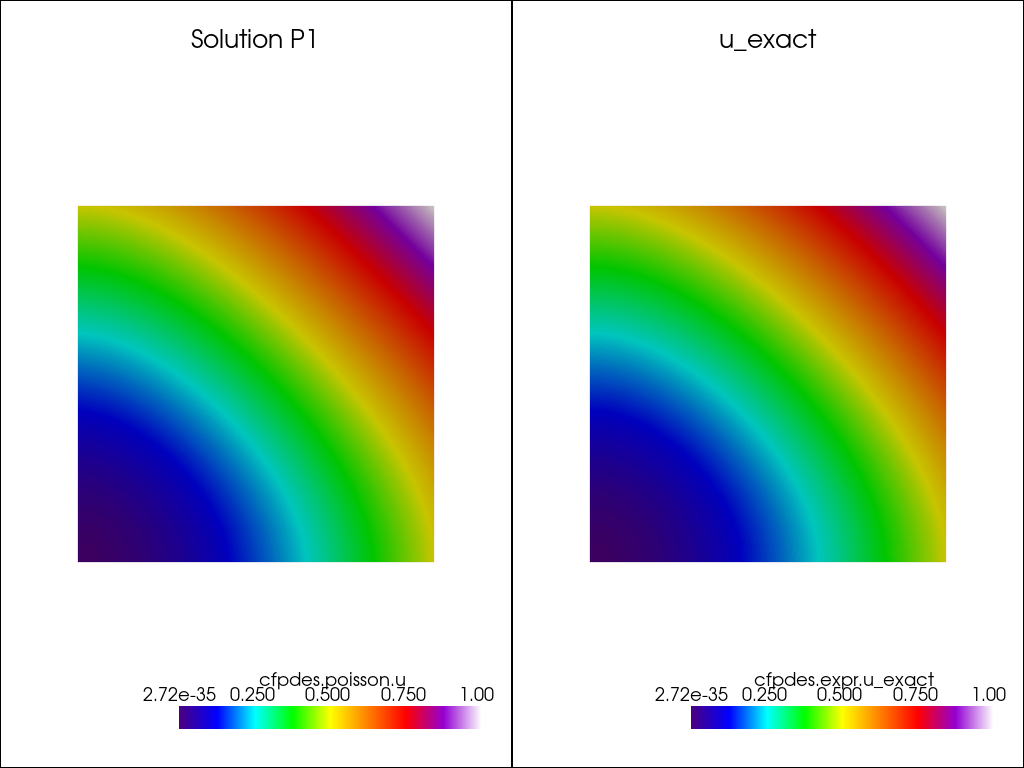

Solving a Poisson problem for h = 0.05...
>> load network /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/networks/test.pth
network was not loaded from file: training needed
epoch     0: current loss = 9.43e+01
epoch     0: best loss = 9.43e+01
epoch     1: best loss = 6.89e+01
epoch     2: best loss = 4.59e+01
epoch     3: best loss = 2.54e+01
epoch     4: best loss = 1.98e+01
epoch     8: best loss = 1.81e+01
epoch    13: best loss = 1.78e+01
epoch    14: best loss = 1.78e+01
epoch    16: best loss = 1.74e+01
epoch    17: best loss = 1.61e+01
epoch    19: best loss = 1.58e+01
epoch    20: best loss = 1.38e+01
epoch    21: best loss = 1.37e+01
epoch    22: best loss = 1.30e+01
epoch    23: best loss = 9.97e+00
epoch    25: best loss = 9.83e+00
epoch    27: best loss = 9.15e+00
epoch    30: best loss = 8.62e+00
epoch    31: best loss = 7.53e+00
epoch    33: best loss = 6.87e+00
epoch    35: best loss = 6.66e+00
epoch    37: best loss = 6.11e+00
epoch    40: best loss = 

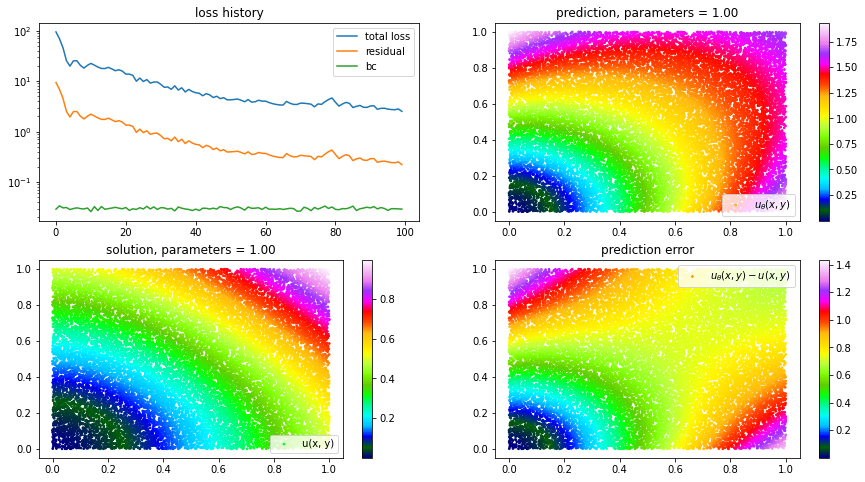

                          0
0  cfpdes.expr.grad_u_exact
1           cfpdes.expr.rhs
2       cfpdes.expr.u_exact
3          cfpdes.poisson.u
Number of features in coordinates: 3
Number of points: 517

Nodes from export.case: [[0.82477343 0.04606718]
 [0.8300841  0.10191753]
 [0.7806651  0.09123866]
 ...
 [0.8390992  0.3016979 ]
 [0.8367227  0.1427201 ]
 [0.7476512  0.5844005 ]]

Feel++ solution 'cfpdes.poisson.u':
[3.76265317e-01 3.88901174e-01 3.53013813e-01 6.39755502e-02
 8.36924985e-02 7.99496025e-02 7.88235307e-01 7.77451158e-01
 7.43493915e-01 2.76082188e-01 3.15237820e-01 2.88235307e-01
 3.15580815e-01 3.07254106e-01 3.40455621e-01 4.42461520e-01
 4.47269469e-01 4.14715320e-01 6.15916662e-02 2.75622636e-01
 2.85768151e-01 1.81298852e-01 2.05479741e-01 2.16002733e-01
 1.84969917e-01 8.84883851e-02 7.87167102e-02 9.94065255e-02
 2.56376028e-01 1.11827716e-01 2.41881713e-01 4.07505304e-01
 1.59044728e-01 1.56661481e-01 1.31011620e-01 1.18826389e-01
 1.04846478e-01 6.34396598e-02 6.4

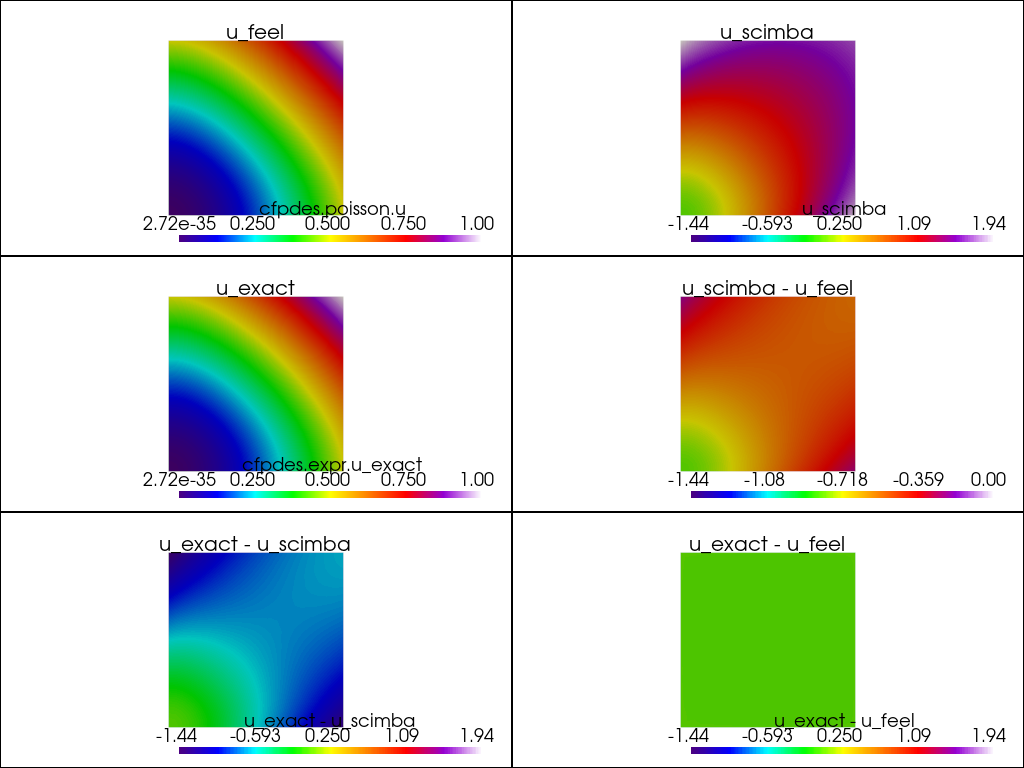

Solving the laplacian problem for h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+--------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                               |
+--------------------------------------------------------------------------------------------------------------------------------------+
| +-----------------------------------------------------------------------------------------+                                          |
| | Environment                                                                             |                       

In [7]:


# # 2D with varying anisotropy
P = Poisson(dim = 2)
u_exact = 'x*x/(1+x) + y*y/(1+y)'
rhs = '-(4 + 2*x + 2*y) / ((1+x)*(1+y))'
P(rhs=rhs, diff='{1+x,0,0,1+y}', g='x*x/(1+x) + y*y/(1+y)', solver='scimba', u_exact = u_exact)

u_exact = 'x*x + y*y'
grad_u_exact = '{2*x, 2*y}'
P(rhs='-2*x - 2*y', diff='{x,y,-y,x+y}', g='x*x + y*y', plot = None,  solver='feelpp', u_exact = u_exact, grad_u_exact= grad_u_exact)
h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []
for i in h:
  P(h=i, rhs='-4', g='x*x + y*y', plot=None, u_exact = u_exact, grad_u_exact = grad_u_exact)
  measures.append(P.measures)

print('measures = ', measures)

poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs = h, verbose=True)
print('measures = ', measures)
fig= plot_convergence(P, df,dim=2)
fig.show()
